In [1]:
import pandas as pd
import numpy as np
from text_to_num import text2num


In [2]:
df = pd.read_csv('./MAU_events_chapter_1.csv')

In [3]:
chr_df = pd.read_csv('allwords.csv',sep='\t',names = ['word', 'sentence_id'])

In [5]:
count_chr = 0
start = df.query("kind=='word'")["onset"].idxmin()
end = start + len(df.query("kind=='word'"))
count_df = start
while count_df < end:
    
    word =  df.at[count_df, 'word']
    chr_word = chr_df.at[count_chr,'word']
    if word == chr_word.strip('-'):
        df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?
        count_df +=1
        count_chr += 1
    
    elif word in chr_word.strip('-'):  #  "l", "avais" in "l'avais"
        df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?
        count_df +=1
        word =  df.at[count_df, 'word']
        assert word in chr_word
        
        df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?
        
        count_df += 1
        count_chr += 1
    elif str(text2num(word, lang='fr')) == str(chr_word):
        df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?
        count_df +=1
        count_chr += 1
        
    else:
        raise ValueError
        

        


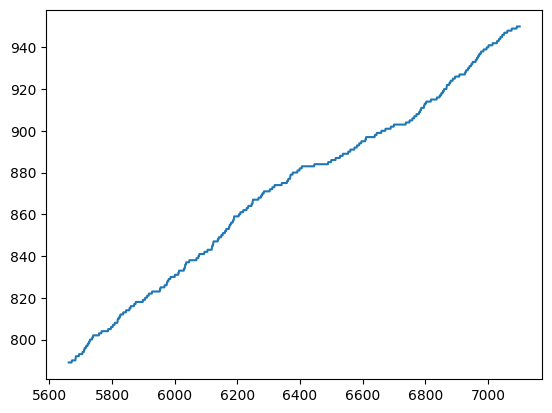

In [15]:
import matplotlib.pyplot as plt
y = df.query("kind=='word'")['sentence_id']
x = df.query("kind=='word'").index
plt.plot(x,y)

In [22]:
def remove_wrongs_from_ind(df_tmp, ind):
    problematic_range = df_tmp.iloc[ind]
    start = problematic_range.onset.values[0]
    duration_last_word = problematic_range.duration.values[-1]
    next_index = ind[-1] + 1
    next_word_onset = df_tmp.iloc[next_index].onset
    to_remove = df_tmp.query(f"{start}<=onset<{next_word_onset} and kind=='phoneme'")
    words_to_remove = df_tmp.query(f"{start}<=onset<{next_word_onset} and kind=='word'") # For printing
    ind.extend(to_remove.index.values.tolist())
    print(to_remove.phoneme, words_to_remove.word)
    df_tmp.drop(index=ind,inplace=True)
    df_tmp.reset_index(inplace=True)
    return df_tmp

In [23]:
chr_df = pd.read_csv('allwords.csv',sep='\t',names = ['word', 'sentence_id'])
count_chr = 0
for run in np.arange(1,10):
    print(f"Run {run} on going\n")
    df = pd.read_csv(f'linnea/MAU_events_chapter_{run}.csv')
    indices = []
    if run == 2:
        # KIll les baobabs
        indices = [6788,6789]
        df = remove_wrongs_from_ind(df,indices)
    if run == 3: 
        indices =[7220,7221,7222,7223,7224,7225,7226]
        df = remove_wrongs_from_ind(df,indices)
    if run == 5:
        indices=[5537,5538,5539,5540,5541,5542]
        df = remove_wrongs_from_ind(df,indices)

        

    start = df.query("kind=='word'")["onset"].idxmin()
    end = start + len(df.query("kind=='word'"))
    count_df = start
    while count_df < end:

        word =  df.at[count_df, 'word']
        chr_word = chr_df.at[count_chr,'word']
        #print(word,chr_word,run)
        #print(count_df,count_chr)
        if word == chr_word.strip('-'):
            df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?
            count_df +=1
            count_chr += 1

        elif word in chr_word.strip('-'):  #  "l", "avais" in "l'avais"
            df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?
            count_df +=1
            word =  df.at[count_df, 'word']
            assert word in chr_word

            df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?

            count_df += 1
            count_chr += 1
        elif str(text2num(word.replace('-',' '), lang='fr')) == str(chr_word):
            df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?
            count_df +=1
            count_chr += 1

        else:
            raise ValueError

            

    

Run 1 on going

Run 2 on going

4699    l
4700    e
4701    b
4702    a
4703    o
4704    b
4705    a
4706    b
Name: phoneme, dtype: object 6788        les
6789    baobabs
Name: word, dtype: object
Run 3 on going

5154     i
5155     R
5156     a
5157     m
5158     o
5159     n
5160     a
5161     s
5162     w
5163     a
5164     J
5165     2
5166     z
5167     m
5168    a~
5169     s
5170     e
5171     v
5172     o
5173     l
5174     k
5175    a~
5176    a~
5177     a
5178     k
5179     t
5180     i
5181     v
5182     i
5183     t
5184     e
Name: phoneme, dtype: object 7220               il
7221           ramona
7222    soigneusement
7223              ses
7224          volcans
7225               en
7226         activité
Name: word, dtype: object
Run 4 on going

Run 5 on going

3451     S
3452     f
3453     E
3454     l
3455     a
3456    e~
3457     m
3458     e
3459     t
3460     j
3461     e
3462     t
3463     E
3464     R
3465     i
3466     b
3467     l
Name: phoneme, d

ValueError: invalid literal for text2num: 'Tu'

In [9]:
off = 10
start = 7102
end = 9048

In [10]:
df.iloc[start-off:start+off]

,Unnamed: 0,phoneme,onset,duration,kind,low,high,mid,labial,glottal,...,vowel,plosive,fricative,nasal,approximant,trill,voice,voiced_vowel,word,sentence_id
7092,7092,NaN,605.39,0.13,word,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mais,950.0
7093,7093,NaN,605.52,0.17,word,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tu,950.0
7094,7094,NaN,605.69,0.03,word,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,950.0
7095,7095,NaN,605.72,0.06,word,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pur,950.0
7096,7096,NaN,605.78,0.08,word,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,et,950.0
7097,7097,NaN,605.86,0.03,word,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tu,950.0
7098,7098,NaN,605.89,0.10,word,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,viens,950.0
7099,7099,NaN,605.99,0.03,word,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,950.0
7100,7100,NaN,606.02,0.18,word,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,une,950.0
7101,7101,NaN,606.20,0.15,word,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,étoile,950.0


In [11]:
chr_df.iloc[end-off:end+off]

,word,sentence_id
9038,encore,949
9039,Mais,950
9040,tu,950
9041,es,950
9042,pur,950
9043,et,950
9044,tu,950
9045,viens,950
9046,d'une,950
9047,étoile,950
